In [1]:
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import tensorflow as tf
import pandas as pd
from matplotlib.pyplot import specgram
%matplotlib inline


/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
training_data = pd.read_csv("../train-002/train.csv")

In [3]:

training_data["Path"] = "../train-002/Train/" + training_data["ID"].map(str) + ".wav"
training_data.head()

,ID,Class,Path
0,0,siren,../train-002/Train/0.wav
1,1,street_music,../train-002/Train/1.wav
2,2,drilling,../train-002/Train/2.wav
3,3,siren,../train-002/Train/3.wav
4,4,dog_bark,../train-002/Train/4.wav


In [4]:
def load_sound_files(file_paths):
    raw_sounds = []
    for fp in file_paths:
        X,sr = librosa.load(fp)
        raw_sounds.append(X)
    return raw_sounds

In [5]:
def plot_waves(data):
    i = 1
    sound_names = data["Class"].tolist()
    raw_sounds = load_sound_files(data["Path"].tolist())
    fig = plt.figure(figsize=(25,60))
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        librosa.display.waveplot(np.array(f),sr=22050)
        plt.title(n)
        i += 1
    plt.suptitle("Figure 1: Waveplot",x=0.5, y=0.915,fontsize=18)
    plt.show()

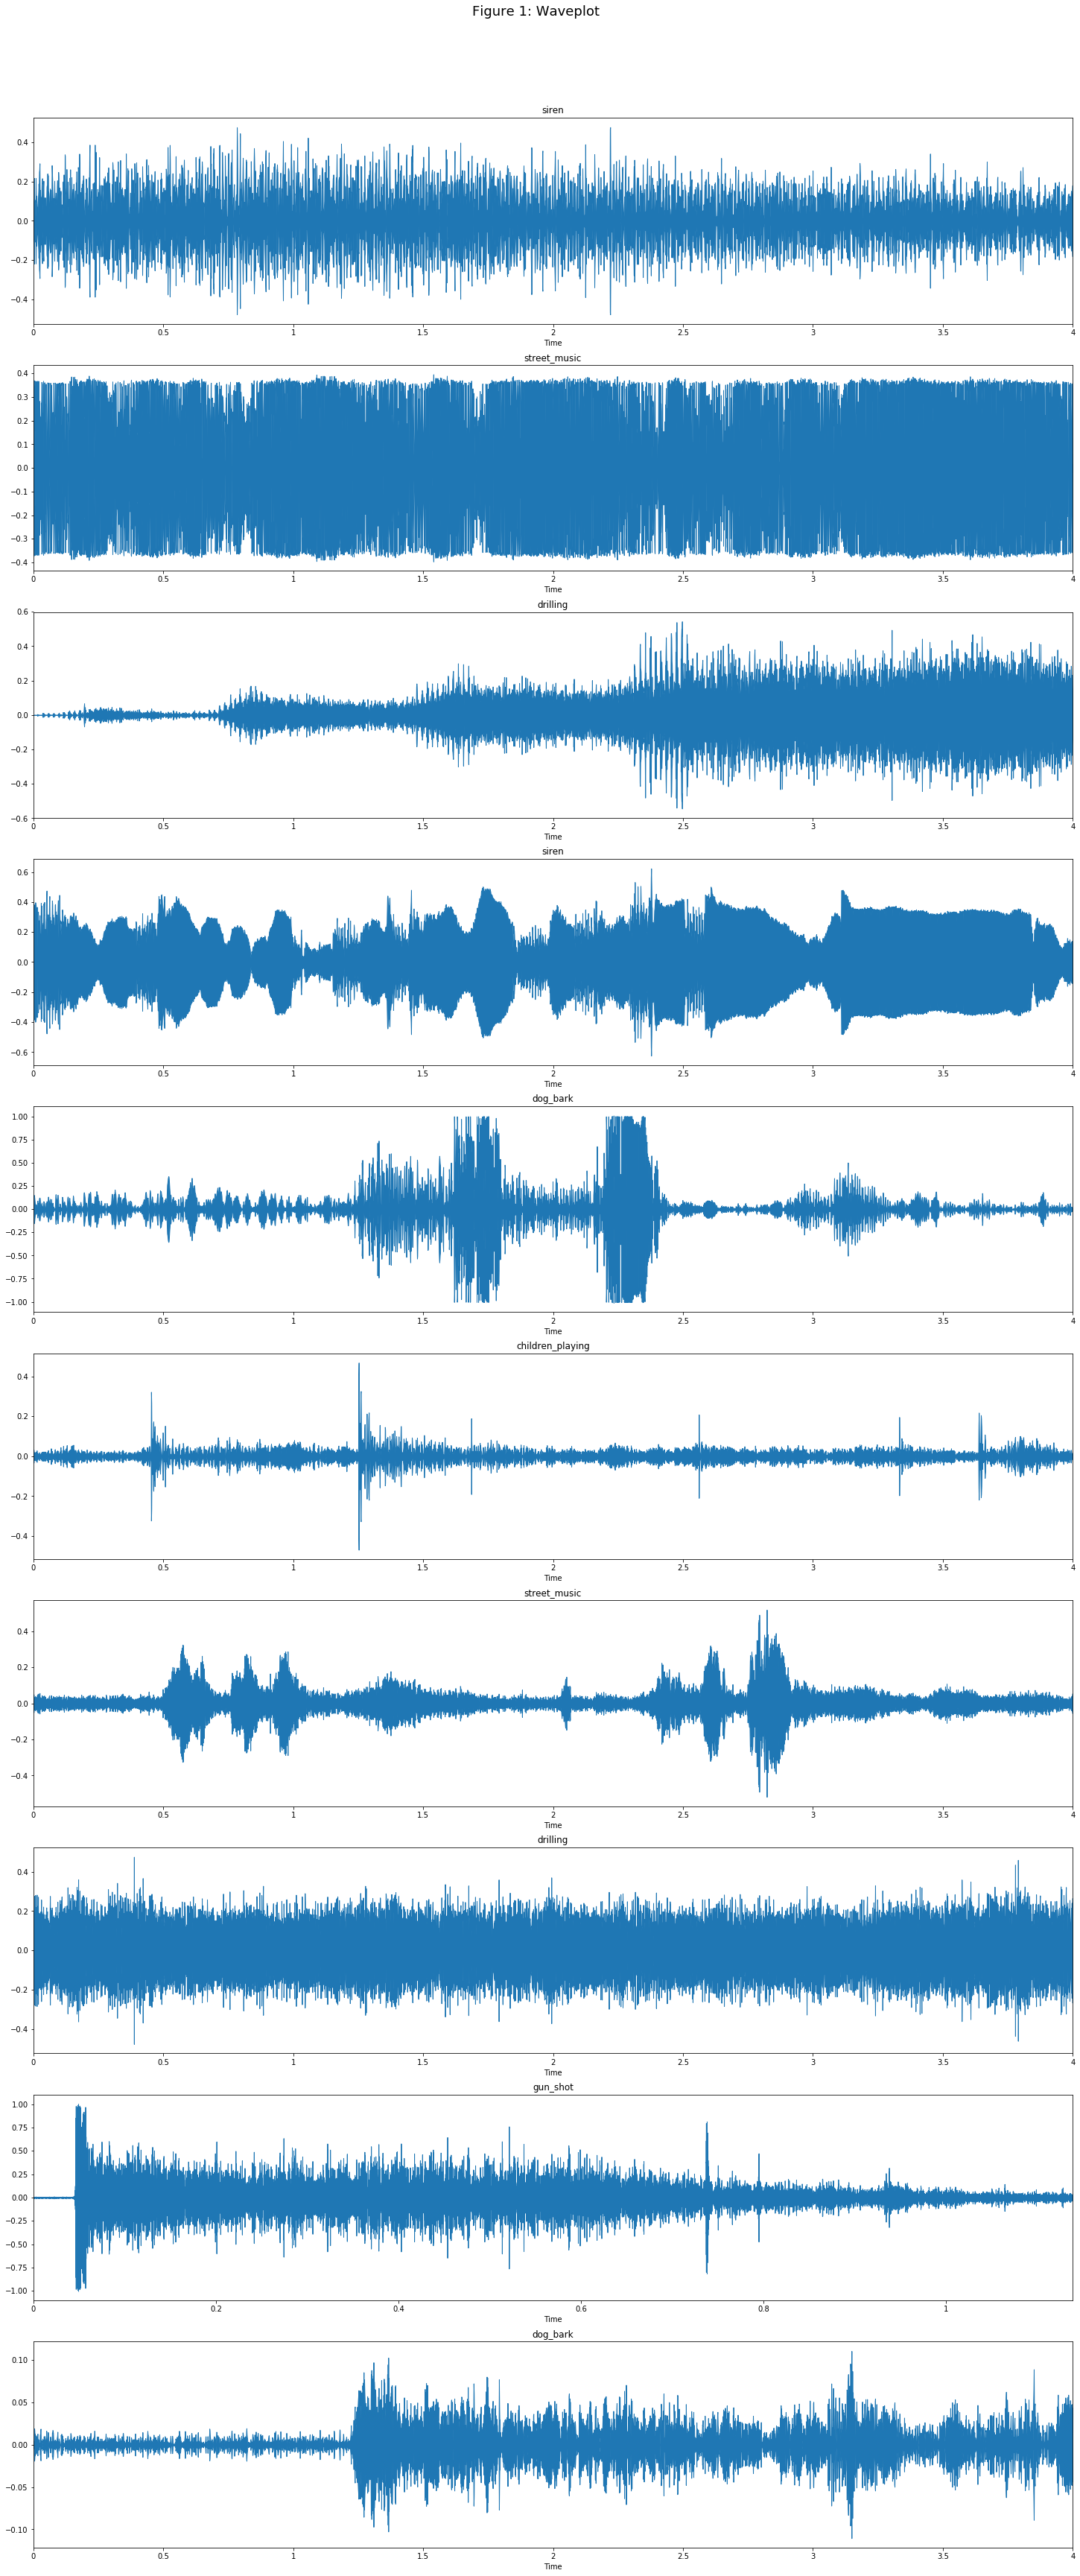

In [6]:
plot_waves(training_data[:10])